# Photon-to-axion/dark-photon coupling solver in the case of costant magnetic field and linear $n_e(z)$ 

#### **Introduction**

This notebook numerically integrates the photon-to-axion equation of motion in the Landau-Zener approximation. 

 **Differential "master" equation**

The photon-axion conversion physics is described by the following coupled first order ODEs:

$$  \begin{cases}
        i A_\parallel'(z)  = \Delta_{\gamma a} (z) a(z) e^{-i \int_{z_i}^z (\Delta_a-\Delta_\parallel (z')) dz'} \\
         i a(z)  = \Delta_{\gamma a} (z) A_\parallel(z) e^{+i \int_{z_i}^z (\Delta_a-\Delta_\parallel (z')) dz'}
    \end{cases}$$
where the derivatives are taken with respect to the direction along which the photon travels, which we denote by $z$, and
$$\begin{cases}
        \Delta_\parallel(z) =\Delta_\gamma(z)=- \frac{1}{2\omega} \left(\frac{4\pi \alpha n_e(z)}{m_e}\right) = -\frac{m^2_\gamma(z)}{2\omega}, \\ 
        \Delta_{\gamma a}(z) = \frac{g_{a\gamma\gamma}}{2} B_T(z), \\
        \Delta_a = -\frac{m^2_a}{2\omega}. 
    \end{cases}$$

Because we are discussing the photon-to-axion case (and not the axion-to-photon case), we have the following initial conditions: 
$$  \begin{cases}
        |A_\parallel(z_i)|^2 = 1 \\
        a(z_i) = 0
    \end{cases} \, \, \, \, \text{and} \, \, \, \, a'(z_i) = -i \Delta_{a\gamma}(z_i).
$$

The two equations of motion can be merged in one equation as:

$$ \boxed{\ \ \ a'' (z) + \left[ i \left(\Delta_\parallel (z)-\Delta_a  \right) -\frac{\Delta'_{\gamma a}(z)}{\Delta_{\gamma a}(z)}\right] a'(z) +\Delta^2_{a\gamma} a(z) = 0 \ \ \ }$$

leaving unchanged the initial conditions. 

We will refer to this second-order ODE as the "master" equation to solve. 

Equivalently, we could also consider the second-order ODE master equation written with respect to $A_\parallel(z)$, namely: 

$$\boxed{ \, \, \,  A''_\parallel (z) + \left[ i \left(\Delta_a -\Delta_\parallel (z) \right) -\frac{\Delta'_{\gamma a}}{\Delta_{\gamma a}}\right] A'_\parallel(z) +\Delta^2_{a\gamma} (z) A_\parallel(z) = 0, \, \,\, }$$
where the initial conditions now read
$$  \begin{cases}
        |A_\parallel(z_i)|^2 = 1 \\
        a(z_i) = 0
    \end{cases} \, \, \, \text{and} \, \, \, A'_\parallel(z_i) =0. $$

    

 **Landau and Zener Approximation - Constant Magnetic Field and Linear Electron Number Density**

This is the case we have 

$$a'' (z) +  i \left(\Delta_\parallel (z)-\Delta_a  \right)  a'(z) +\Delta^2_{a\gamma}  a(z) = 0,$$
where $\Delta^2_{a\gamma}$ is constant and $\Delta_\parallel (z)$ is linear.

For small values the probability here is reduced to the one given by the **Landau-Zener formula**, i.e.: 
$$P_{\gamma \rightarrow a}^{res} = 1-e^{-2\pi \gamma} \simeq 2\pi \gamma,$$

where

$$\gamma = \frac{\Delta^2_{a\gamma}}{\Big|\frac{d\Delta_\parallel(z)}{dz}\Big|}.$$


----------------------------------------------------------------

We can work on this equation numerically in three different ways: 


1) Rewriting the master equation keeping $\Delta_\parallel(z) - \Delta_a$ and working with $\tilde{z} = \Delta_{a\gamma} z = \Delta_{a\gamma}  \ \text{Mpc}  \ z_{\text{adimensional}} $:

In the case we work with adimensional interval, $\tilde{z} = \Delta_{a\gamma} z$, we have

$$ \frac{d^2 a}{d\tilde{z}^2} + i \frac{\Delta_\parallel - \Delta_a}{\Delta_{a\gamma}} \frac{da}{d\tilde{z}} + a = 0$$


$$ a'(\tilde{z}_i) = -i $$



2) Rewriting the master equation with respect to $\gamma$ and working with $\tilde{z}$:

$$ \frac{d^2 a}{d\tilde{z}^2} + i \frac{\tilde z}{\Delta_{a\gamma} }\frac{da}{d\tilde{z}} + a = 0$$

$$a'(\tilde{z}_i) = -i $$

3) À la Carenza and Marsh way, using 

$$  u''(\tilde z) +\left(1+\frac{1}{2n} - \frac{\tilde z^2 }{(2n)^2}\right) u(\tilde z) =0  $$

$$u'(\tilde z_i) = -i $$

where 

$$u(z) = e^{\frac{i}{2}\int_{z_i}^{z} dz' \ (\Delta_\parallel(z) - \Delta_a ) } a(z)$$
$$ n = i\gamma$$
$$\tilde z = \Delta_{a\gamma}z.$$

We will use the following parametrization for $n_e(z)$ linear: 

$$n_e(z) =  n_{e0} \left(1+\frac{z}{z_0}\right) = \frac{m_a^2  m_e}{4\pi\alpha} \left(1+\frac{z}{z_0}\right) $$

where $z_0$ is a scale of reference, a pivotal scale. 


---------------------------------

The photon-to-dark-photon case is physical identical, it is obtained with the following switch

$$\Delta_{a\gamma} \  \longrightarrow \ \varepsilon \Delta_a.$$



---------------------------------

The units we want to use hereafter are the natural units, $c=\hbar = k_B = 1$, and therefore all the quantities are written as energy in $GeV$: $[g_{a\gamma \gamma}] = GeV^{-1}$, $[m_a] = [m_e] = [m_\gamma] = GeV$, $[\omega] = GHz$, $[B] = \mu G$. 



-------------------------------

#### **General solver for Landau and Zener Approximation**


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, solve_ivp, ode
from scipy.stats import norm
from scipy.interpolate import CubicSpline, interp1d
import math


#OdeintW - wrapper to solve ODE with complex terms.
#import odeintw 
#from odeintw import odeintw


# Visual settings
%config InlineBackend.figure_format='retina'
%matplotlib inline

if '/Library/TeX/texbin/' not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
    
# Latex font
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import colors
plt.rcParams['figure.figsize'] = [9,7]  # Adjust the size as needed for the plots
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Want to study photon-to-axion or photon-to-dark-photon?

dark_photon = False #Set False if you want to work with axion

In [3]:
####################################
# Natural unit conversions
####################################

#We express all the quantities in eV
GeV = 1 
MeV = 1e-3
keV = 1e-6
eV  = 1e-9
meV = 1e-12 

#Units:
Kg     = 5.609 * 1e35 * eV
meter  = 5.07 * 1e6 * eV**-1
cm     = 1e-2 * meter
Km     = 1e3 * meter
Mpc    = 1.564 * 1e29 * eV**-1
second = 1.5192 * 1e15 * eV**-1
Hz     = 1/second


Gauss  = 1.95 * 1e-2 * eV**2
Joule  = 6.242 * 1e18 * eV  

#Constants
AlphaEM           = 1/137
H_0               = 67.66 * Km/second / Mpc
ElementaryCharge  = np.sqrt(4 * np.pi * AlphaEM);
mass_electron     = 9.109 * 1e-31 * Kg
mass_proton       = 1.672 * 1e-27 * Kg
numerical_density = 1/cm**3


In [4]:
#How to return back to IS: 
#1) Take the expression of a quantity 
#2) Multiply it for the inverse of its own unities. 

#Some examples of conversion: 
 
print('H_0 in natural units is', H_0 , 'eV')
print('H_0 in IS units is', 1.4429776887871855e-33 * (Km/second / Mpc)**-1, 'Km/s/Mpc')

print('The electron mass in natural units is', mass_electron , 'eV')
print('The electron mass in IS units is', 510923.81000000006 * Kg**-1, 'Kg' )

print('The speed of light c in natural units is', 1)
print('The speed of light c in IS units is', 1 *(Km/second)**-1, 'Km/s')

print('The reduced Planck constant in natural units is', 1)
print('The reduced Planck constant in IS units is', 1 * (Joule * second)**-1, 'J * s')


H_0 in natural units is 1.4437375506559516e-42 eV
H_0 in IS units is 67624389473.68421 Km/s/Mpc
The electron mass in natural units is 0.0005109238100000001 eV
The electron mass in IS units is 9.109000000000001e-22 Kg
The speed of light c in natural units is 1
The speed of light c in IS units is 299644.9704142012 Km/s
The reduced Planck constant in natural units is 1
The reduced Planck constant in IS units is 1.0545356929961453e-34 J * s


In [5]:
########################################
# Interval of integration
########################################


zmin  = -2  #Here we work in units of Delta_ag Mpc, i.e. with \tilde{z} = Delta_{ag} Mpc z_adimensional
zmax  = 2 

z_num = 4000001
z_thr = np.linspace(zmin, zmax, z_num) # Interval, in Delta_ag * Mpc. 


z_res =  z_clust =  z_thr[3000000] 

z_0 = z_thr[3000000] #Just a pivotal scale. Try to always set it to 1 (Delta_ag Mpc )
z_0



np.float64(1.0)

In [6]:
########################################
# Specify parameters of the model
########################################

m_a   = 3e-13 * eV# Axion mass in eV
g_agg = 1e-10 * (GeV)**-1 # Axion photon-coupling in (GeV)^-1
nu    = 145 * 10**9 * Hz # Frequency in Hz 
omega = 2.*np.pi*nu # Angular frequency in Hz

if dark_photon:
    eps   = 1e-5 #photon-dark photon coupling “natural” values in the range 1e-13 - 10e-2 eV 



In [7]:
########################################
# Specify functions of the model in the case of constant magnetic field and linear electron numerical density.
########################################

#Note: we decided to work with \Delta_a and \Delta_\parallel defined without the minus sign. It is totally equivalent and the solution does not change.

def Delta_a(z):
    """
    Axion mass term
    Delta_a = -m_a^2/(2*omega)
    """
    return m_a**2/(2*omega) 


z_shift = 0 #Shift if you want the resonance somewhere else  
def n_e(z):
    """
    Numerical density of electrons
    given by the halo model. 
    In this toymodel, all the units are encoded in C = m^2_a m_e/(4\pi\alpha), meaning the z used is still \tilde{z}. 
    """
    z_shifted = z-z_shift
    return   (m_a**2 * mass_electron/(ElementaryCharge)**2 )  * (1 + z_shifted/(z_0))   #Just a toy model in ortder to have Delta_parallel-Delta_a = Delta_a(z/z_0)


def m2_g(z):
    """
    Effective mass of the photon
    acquired by scattering with free electrons
    """
    return   ElementaryCharge**2 * 1/mass_electron * n_e(z) #in eV units 


def B_T(z):
    """
    Transverse magnetic field
    """
    return  1 * 1e-6 * Gauss  #in \mu G 


def Delta_parallel(z):
    """
    Photon mass term
    Delta_parallel = -m^2_\gamma(z)/2\omega
    """
    return m2_g(z) /(2* omega)



if dark_photon:
    def Delta_ag(z):
        return eps*Delta_a(z)
else:
    def Delta_ag(z):
        """
        Axion-photon coupling term
        Delta_{a\gamma} = g_{a\gamma\gamma}/2 B_T(z)
        """
        return g_agg/2 * B_T(z)


def Delta_osc(z): 
    return np.sqrt((Delta_a(z) - Delta_parallel(z))**2 + 4 * (Delta_ag(z))**2)




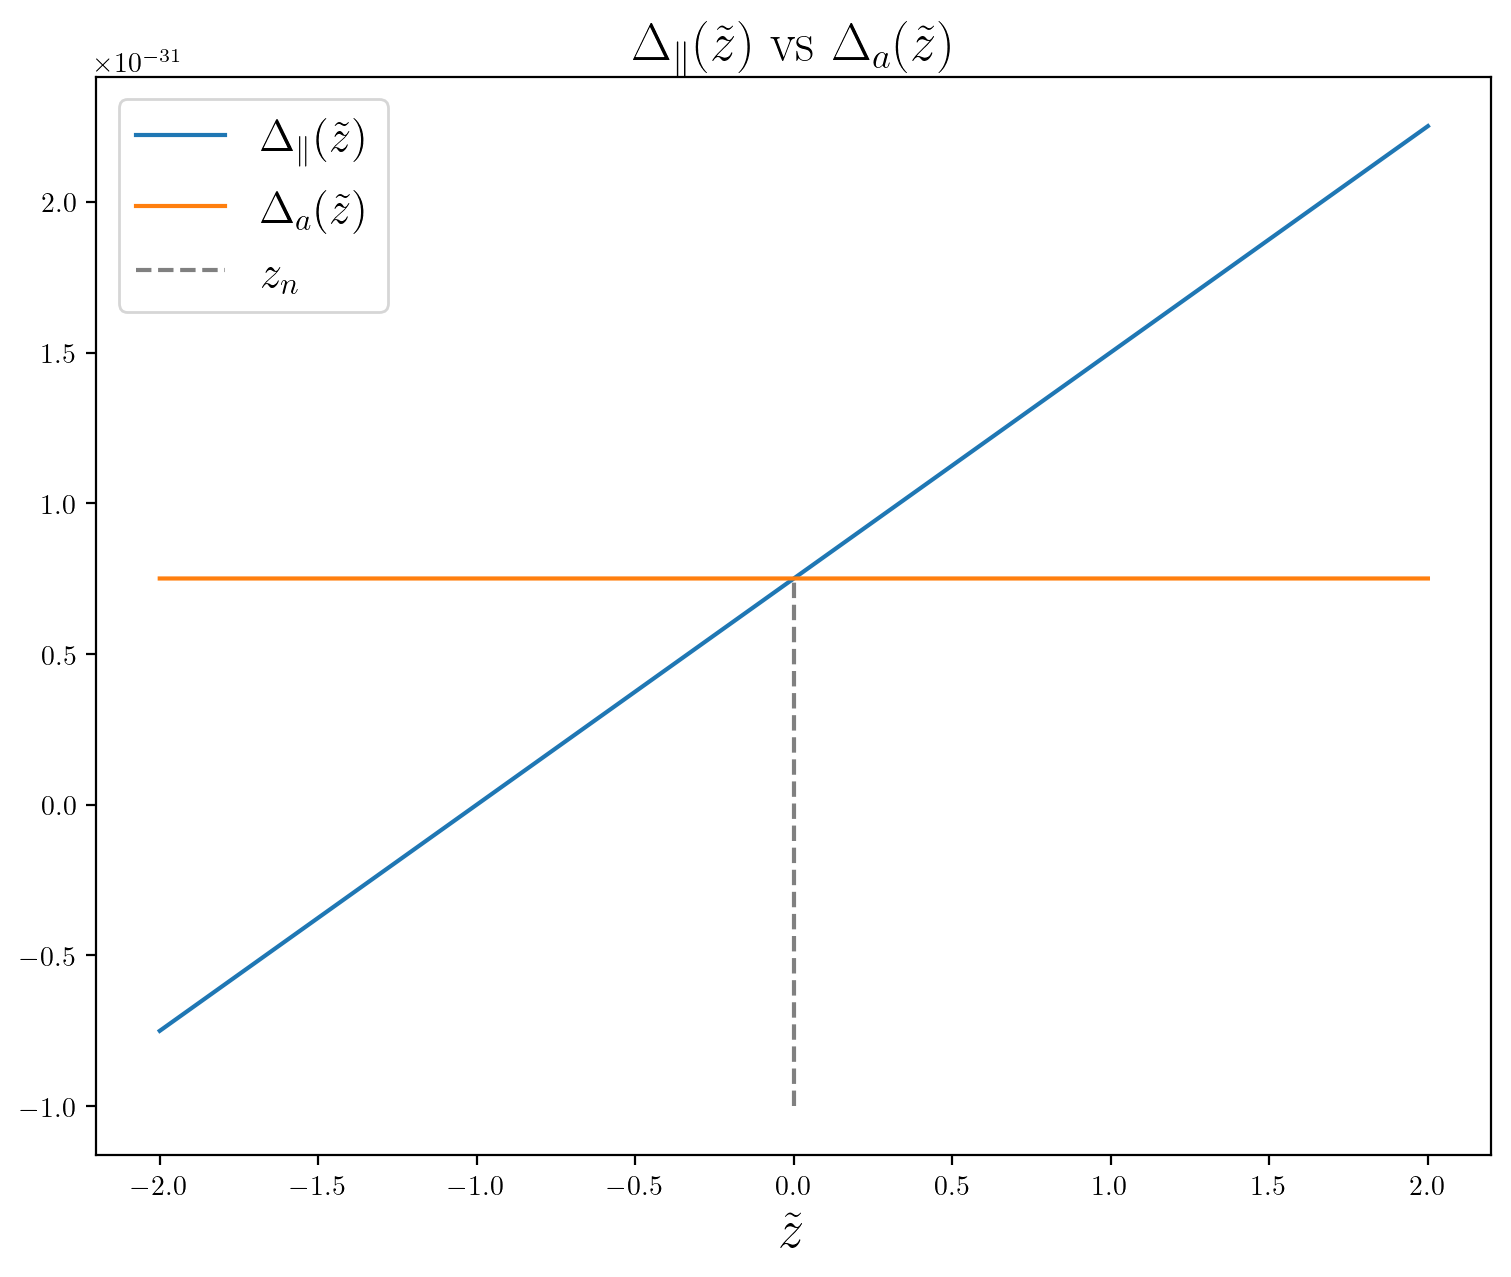

In [8]:
#Plotting Delta_parallel and Delta_a to check if and where resonance happens. 

plt.plot(z_thr, Delta_parallel(z_thr), label=r'$\Delta_\parallel(\tilde{z})$')
plt.plot(z_thr, Delta_a(z_thr)* np.ones_like(z_thr), label=r'$\Delta_a(\tilde{z})$')
z_n_line = plt.vlines(z_shift, -1e-31, Delta_a(z_shift), linestyle='dashed', color='gray', label=r'$z_n$')

plt.title(r'$\Delta_\parallel(\tilde{z})$ vs $\Delta_a(\tilde{z})$', fontsize=19)
plt.xlabel(r'$\tilde{z}$', fontsize=19)

plt.legend(fontsize=16, loc='upper left')

plt.show()

In [10]:
#Computing the derivative of Delta_parallel and the factor gamma = Delta_ag(\tilde{z})/|dDelta_ag(\tilde z) / d\tilde{z}|

dDelta_parallel = np.abs(np.gradient(Delta_parallel(z_thr), z_thr))

gamma_factor = (Delta_ag(z_thr))/(dDelta_parallel)
gamma_factor

array([1.29934662e-05, 1.29934662e-05, 1.29934662e-05, ...,
       1.29934662e-05, 1.29934662e-05, 1.29934662e-05])

In [11]:
# Computing gamma by hand to check if the derivation went well: 

#With our n_e(z) parametrization, we have gamma \Delta_{a\gamma}z_0/\Delta_{a} 

gamma_factor_direct = Delta_ag(z_thr)/Delta_a(z_thr) * z_0
gamma_factor_direct

np.float64(1.2993466192769797e-05)

In [12]:
#Computing the index of z_shift in the z_thr interval
index_z_shift = np.argmin(np.abs(z_thr - z_shift))
index_z_shift

np.int64(2000000)

In [13]:
#Computing the probability à la C. Mondino, and comparing it with 2\pi\gamma

log = np.log(m2_g(z_thr))
derivative = np.abs(np.gradient(log, z_thr))**-1

if dark_photon:
    prob_Mondino  = (np.pi * eps**2 * m_a**2/omega ) * derivative[index_z_shift] /(Delta_ag(z_thr)) #Here the resonance happens at z_shift, then you need the index of it
else:
    prob_Mondino  = omega * np.pi * g_agg**2 * B_T(z_clust)**2 / m_a**2 * derivative[index_z_shift] /(Delta_ag(z_thr))  #Here the resonance happens at z_shift, then you need the index of it

print("2*pi*gamma is",  2*np.pi*gamma_factor[index_z_shift])
print("Mondino's probability is",  prob_Mondino)

2*pi*gamma is 8.164035586992096e-05
Mondino's probability is 8.164035587174585e-05


/var/folders/jc/kky54qz15j50ck9_kzrzk_d80000gn/T/ipykernel_23951/2028305092.py:3: RuntimeWarning: divide by zero encountered in log
  log = np.log(m2_g(z_thr))
/var/folders/jc/kky54qz15j50ck9_kzrzk_d80000gn/T/ipykernel_23951/2028305092.py:3: RuntimeWarning: invalid value encountered in log
  log = np.log(m2_g(z_thr))


To solve the second-order differential equation numerically we need to define a system reducing the latter in two first order ODE. 
We define 
$$ f= \frac{da}{d\tilde z}$$
and then, e.g. for the first working case,
$$ \begin{cases} 
f = \frac{da}{d\tilde z} \\
f' = - i \frac{\Delta_\parallel (z) - \Delta_a(z)}{\Delta_{a\gamma}} -a
\end{cases} \ \ \ \ \ \text{with} \ \ \ \ \ \text{IC}: \begin{cases}
f_i = -i\\ 
a_i =0
\end{cases}$$

**Note on the numerical solver:**

Here we present to way of integrating numerically the equation: with the wrapper odeintw (wrapper for odeint able to solve the ode with complex quantities) and with solve_ivp. In the case of solve_ivp you are able to chose the numerical integration method, e.g. RK45 and DOP853. We noted that with DOP853 (which is the Runge-Kupta numerical integration up to the 8th order) the solution is understimated, meaning it has the same form but it is translated along the y axis.

In [14]:
########################################
# Solving the differential equation in the three working ways listed above
########################################

#Defining the solvers:

#Working case 1)
def master_eq_LZ_1(z,S): #Note: in the case you want to solve with solve_ivp, use (z,S); in the case you want to solve with odeintw, use instead (S,z)
    """ Master equation """
    S = np.asarray(S, dtype=np.complex128)
    ax, f = S
    dSdz = [f, -1j * (Delta_parallel(z) - Delta_a(z))/(Delta_ag(z)) * f  - ax]
    return np.array(dSdz, dtype=np.complex128)

#Working case 2) 
#Note: if you work on an interval from 0 on, or z_res \=0, remember to shift z.
def master_eq_LZ_2(z,S):
    """ Master equation written in gamma """
    S = np.asarray(S, dtype=np.complex128)
    ax, f = S
    dSdz = [f, -1j/gamma_factor[0] * (z-z_shift) * f  - ax]
    return np.array(dSdz, dtype=np.complex128)

#Working case 3) (Carenza and Marsh equation)
#Note: if you work on an interval from 0 on, or z_res \=0, remember to shift z.
def master_eq_LZ_3(z,S):
    """ Carenza and Marsh equation """
    S = np.asarray(S, dtype=np.complex128) 
    ax, f = S
    n = 1j * gamma_factor[0] #* gamma_factor[0]
    dSdz = [f, -1*(1+1/(2*n) - (z-z_shift)**2/(2*n)**2 )*ax ]
    return np.array(dSdz, dtype=np.complex128)


#Initial values
z_init = z_thr[0]
ic_LZ = np.array([ 0, -1j ], dtype=np.complex128)


# Solving the ODE (solve_ivp method commented)
sol_LZ_1 = solve_ivp(master_eq_LZ_1, (z_thr[0], z_thr[-1]), ic_LZ, method='RK45', t_eval=z_thr, rtol=1e-8, atol=1e-10) #odeintw(master_eq_LZ_1, ic_LZ, z_thr) 

sol_LZ_2 = solve_ivp(master_eq_LZ_2, (z_thr[0], z_thr[-1]), ic_LZ, method='RK45', t_eval=z_thr, rtol=1e-8, atol=1e-10) #odeintw(master_eq_LZ_2, ic_LZ, z_thr) 

sol_LZ_3 = solve_ivp(master_eq_LZ_3, (z_thr[0], z_thr[-1]), ic_LZ, method='RK45', t_eval=z_thr, rtol=1e-8, atol=1e-10) #odeintw(master_eq_LZ_3, ic_LZ, z_thr) 


#Squaring to obtain the probability
p_LZ_1 = np.abs(sol_LZ_1.y[0])**2  #np.abs(sol_LZ_1[:,0])**2 
p_LZ_2 = np.abs(sol_LZ_2.y[0])**2  #np.abs(sol_LZ_2[:,0])**2
p_LZ_3 = np.abs(sol_LZ_3.y[0])**2  #np.abs(sol_LZ_3[:,0])**2  

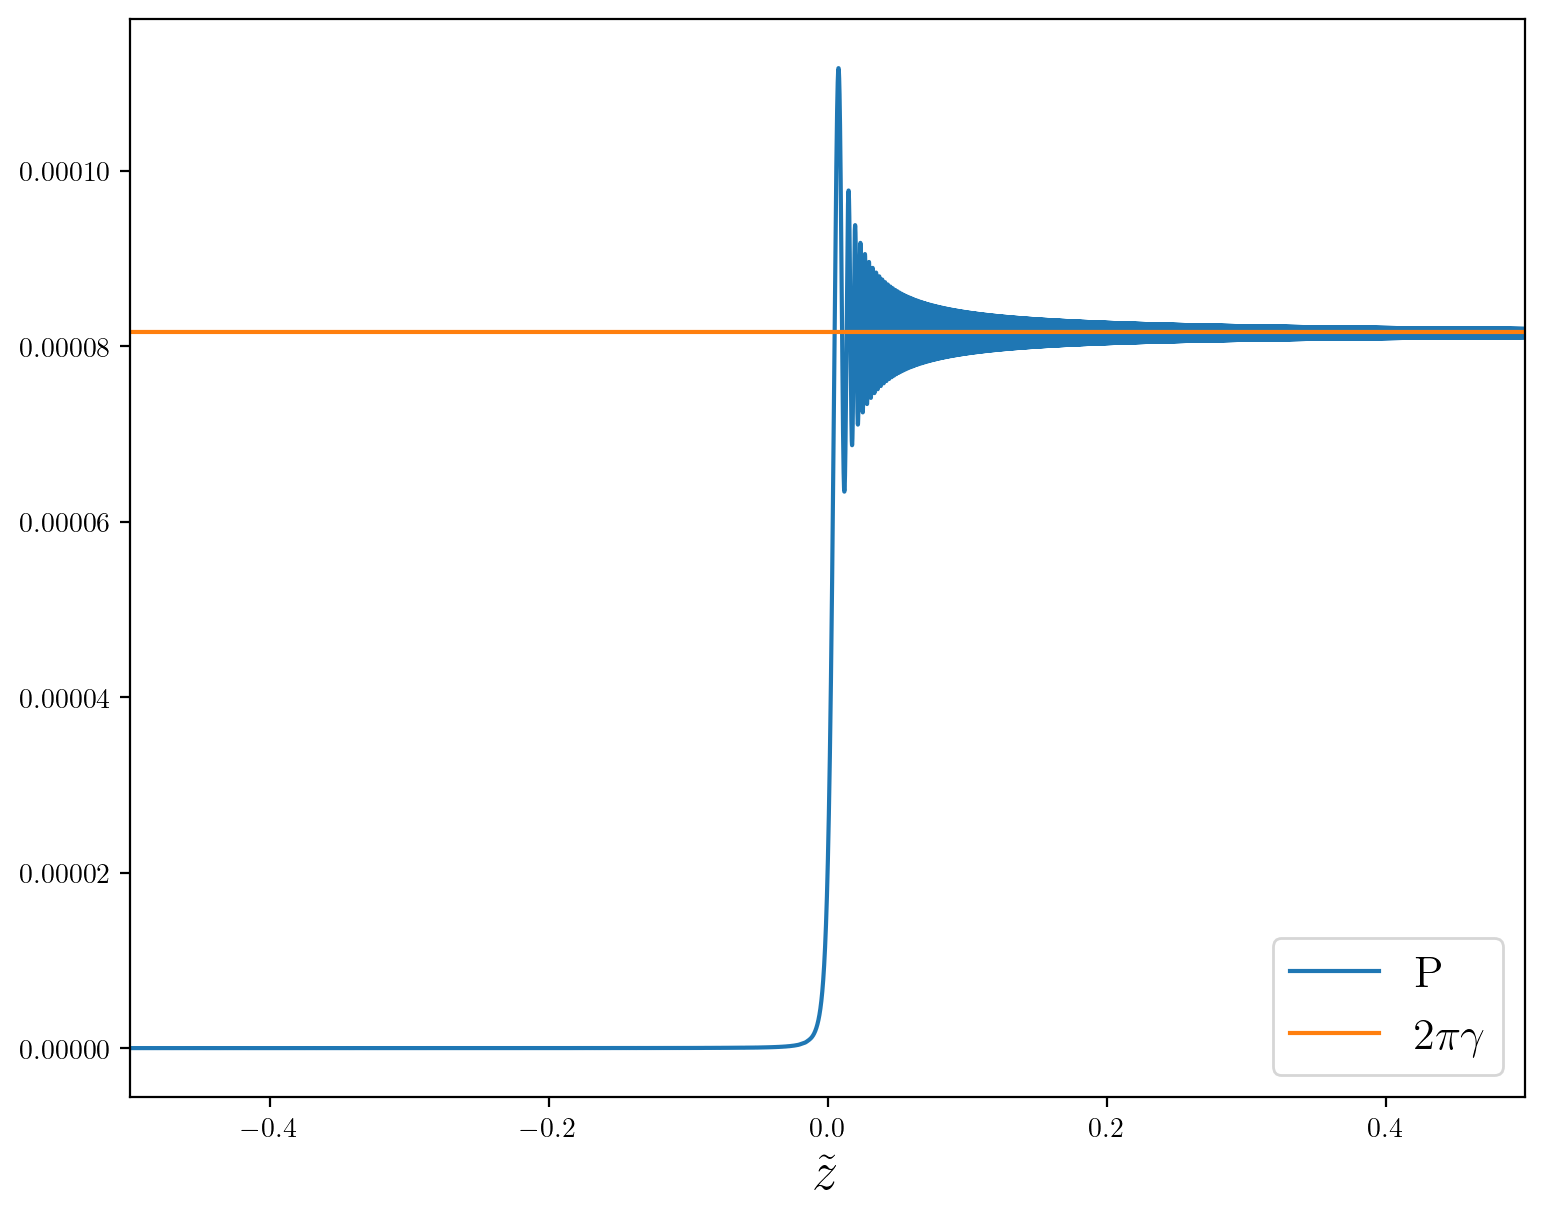

In [16]:
#Plotting the solution
plt.plot(z_thr, p_LZ_1 , label=r'P')
#plt.plot(z_thr, p_LZ_2, label=r'Case 2')
#plt.plot(z_thr, p_LZ_3, label=r'Case 3')
plt.plot(z_thr, 2*np.pi*gamma_factor, label=r'$2\pi\gamma$')
#z_shift_line = plt.vlines(z_shift, 0, 0.0125, linestyle='dashed', color='gray', label=r'$z_{res}$')
plt.xlim(-0.5,0.5)
plt.xlabel(r'$\tilde{z}$', fontsize=19)
plt.legend(fontsize=16, loc='lower right')


